# Objetivo

O objetivo deste notebook é avaliar os dados disponíveis no [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/) no grupo `Matriculas`.

Assim sendo, a avaliação é apenas quanti-qualitativa para descobrirmos o que podemos extrair a favor do nosso projeto.

## 1. Bibliotecas

In [1]:
install.packages("ggplot2")
install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library("dplyr")
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



## 2. Variáveis

In [23]:
path_data <- "/Users/rsilva/Documents/UFRN/Hackathon/UFRN\ Dados/matriculas"
path_save <- "/Users/rsilva/Documents/UFRN/Hackathon/Resultados"


## 3. Avaliando os Dados

In [4]:
setwd(path_data)

pattern <- "matricula-componente"

# listando os arquivos contidos no diretorio
listoffiles <- list.files(path_data, pattern = pattern)

# abrindo os arquivos da lista
myfiles = lapply(listoffiles, read.csv2)

In [29]:
lista <- c("id_turma", "id_curso","unidade","nota","reposicao","faltas_unidade","media_final","numero_total_faltas","descricao")

### - Estudo a Parte

In [30]:
## como os script acima dá erro de leitura, visto que os arquivos não mantem o mesmo padrão
## irei rodar um laço para abrir cada arquivo, reduzir os parametros de desejo e então unificar tudo
## em um unico arquivo para que possamos manipular e identificar padrões

setwd(path_data)

pattern <- "matricula-componente"

# listando os arquivos contidos no diretorio
listoffiles <- list.files(path_data, pattern = pattern)

# abrindo os arquivos da lista
# myfiles = lapply(listoffiles, read.csv2)

resultado <- data.frame()

for(i in 1:length(listoffiles)){
    
    strfile <- listoffiles[i]
    
    file <- read.csv2(strfile, header=TRUE)
    
    reduced <- subset(file, select=lista)
    
    if(nrow(resultado) == 0 & is.data.frame(resultado)){
        resultado <- reduced
    } else {
        resultado <- rbind(resultado, reduced)
    }
}

gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,674766,36.1,2061256,110.1,5676598,303.2
Vcells,57124932,435.9,164578739,1255.7,214160723,1634.0


In [31]:
str(resultado)

'data.frame':	10184029 obs. of  9 variables:
 $ id_turma           : int  57550758 57550758 57550757 57550757 57550757 57550757 57550539 57550539 57550518 57550518 ...
 $ id_curso           : int  5400 5400 5400 5400 5400 5400 5400 5400 5401 5401 ...
 $ unidade            : int  1 2 1 2 1 2 1 2 1 2 ...
 $ nota               : Factor w/ 3287 levels "","0","0.0666667",..: 78 78 585 742 585 585 742 742 2 2 ...
 $ reposicao          : Factor w/ 3 levels "","f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ faltas_unidade     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ media_final        : Factor w/ 165 levels "","0.00","0.10",..: 22 22 98 98 92 92 102 102 2 2 ...
 $ numero_total_faltas: int  0 0 0 0 0 0 0 0 0 0 ...
 $ descricao          : Factor w/ 19 levels "APROVADO","CANCELADO",..: 1 1 1 1 1 1 1 1 9 9 ...


### - Fim do Estudo a Parte

In [ ]:
str(myfiles)

In [17]:
temp <- lapply(myfiles, FUN = function(x){x[, lista]})

In [23]:
matriculas <- do.call(rbind, temp)

In [24]:
str(matriculas)

head(matriculas)

'data.frame':	10184029 obs. of  8 variables:
 $ id_curso           : int  5400 5400 5400 5400 5400 5400 5400 5400 5401 5401 ...
 $ unidade            : int  1 2 1 2 1 2 1 2 1 2 ...
 $ nota               : Factor w/ 3287 levels "","0","0.0666667",..: 78 78 585 742 585 585 742 742 2 2 ...
 $ reposicao          : Factor w/ 3 levels "","f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ faltas_unidade     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ media_final        : Factor w/ 165 levels "","0.00","0.10",..: 22 22 98 98 92 92 102 102 2 2 ...
 $ numero_total_faltas: int  0 0 0 0 0 0 0 0 0 0 ...
 $ descricao          : Factor w/ 19 levels "APROVADO","CANCELADO",..: 1 1 1 1 1 1 1 1 9 9 ...


id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao
5400,1,10,f,0,10.00,0,APROVADO
5400,2,10,f,0,10.00,0,APROVADO
5400,1,8,f,0,8.60,0,APROVADO
5400,2,9,f,0,8.60,0,APROVADO
5400,1,8,f,0,8.00,0,APROVADO
5400,2,8,f,0,8.00,0,APROVADO


### 3.1 Estatísticas Individuais

In [29]:
cursos <- as.data.frame(table(matriculas$id_curso))
names(cursos)[1] <- "Curso"
names(cursos)[2] <- "Total"

unidade <- as.data.frame(table(matriculas$unidade))
names(unidade)[1] <- "Unidade"
names(unidade)[2] <- "Total"

nota <- as.data.frame(table(matriculas$nota))
names(nota)[1] <- "Nota"
names(nota)[2] <- "Total"

reposicao <- as.data.frame(table(matriculas$reposicao))
names(reposicao)[1] <- "Reposicao"
names(reposicao)[2] <- "Total"

media <- as.data.frame(table(matriculas$media_final))
names(media)[1] <- "Media"
names(media)[2] <- "Total"

faltas <- as.data.frame(table(matriculas$numero_total_faltas))
names(faltas)[1] <- "Faltas"
names(faltas)[2] <- "Total"

descricao <- as.data.frame(table(matriculas$descricao))
names(descricao)[1] <- "Descricao"
names(descricao)[2] <- "Total"

#### Gráficos Agrupados

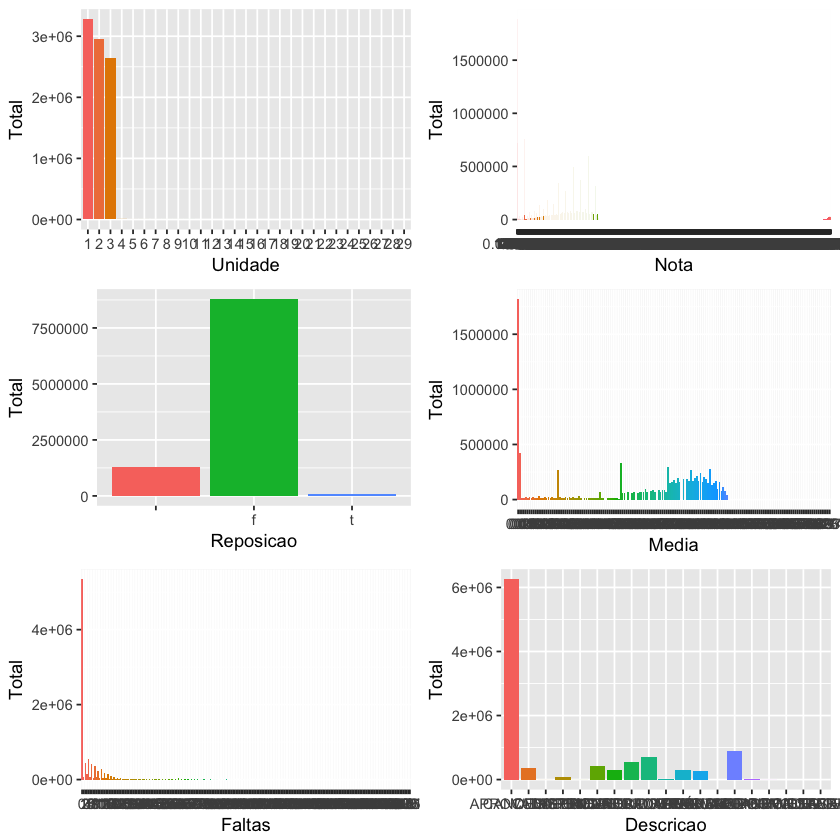

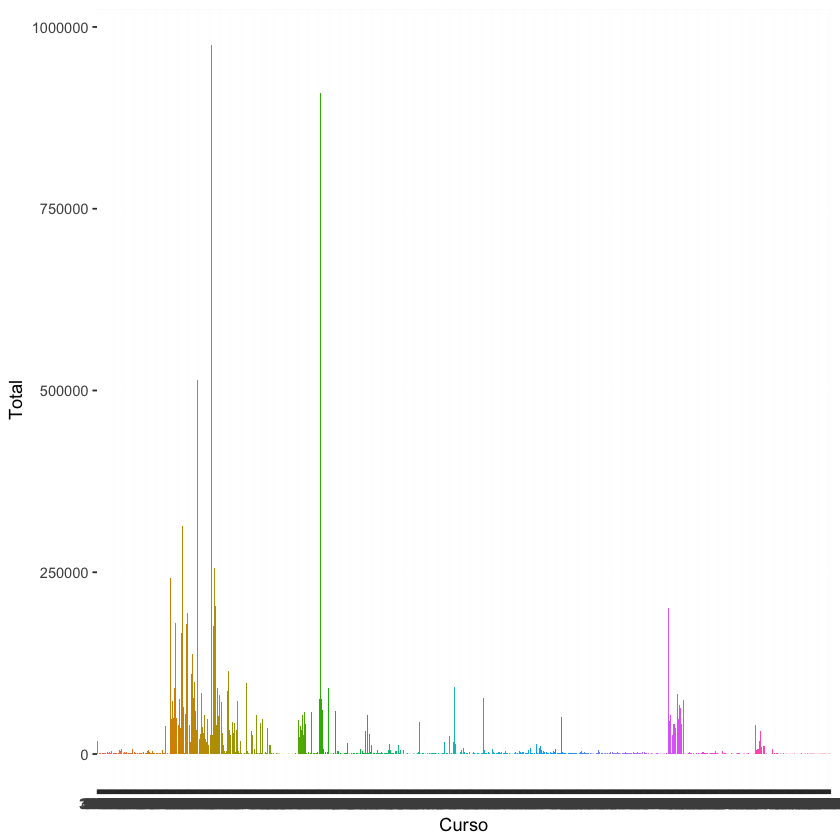

In [33]:
chart_curso <- ggplot(cursos,aes(Curso,Total,fill=Curso))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_unidade <- ggplot(unidade,aes(Unidade,Total,fill=Unidade))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_nota <- ggplot(nota,aes(Nota,Total,fill=Nota))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_reposicao <- ggplot(reposicao,aes(Reposicao,Total,fill=Reposicao))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_media <- ggplot(media,aes(Media,Total,fill=Media))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_faltas <- ggplot(faltas,aes(Faltas,Total,fill=Faltas))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

chart_descricao <- ggplot(descricao,aes(Descricao,Total,fill=Descricao))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="none")

grid.arrange(chart_unidade, chart_nota, chart_reposicao, chart_media, chart_faltas, chart_descricao, ncol=2)

print(chart_curso)

### - Estudo a Parte

In [32]:
summary(resultado)

    id_turma           id_curso            unidade             nota        
 Min.   : 1151159   Min.   :     4970   Min.   : 1.0             :1885980  
 1st Qu.: 1190654   1st Qu.:  2000033   1st Qu.: 1.0      10     : 757616  
 Median : 1230166   Median :  2000063   Median : 2.0      0      : 722770  
 Mean   :22187038   Mean   : 23038340   Mean   : 1.9      9      : 601253  
 3rd Qu.:57572324   3rd Qu.: 10320810   3rd Qu.: 3.0      8      : 492459  
 Max.   :57612858   Max.   :126501266   Max.   :29.0      8.5    : 376153  
                    NA's   :50873       NA's   :1306586   (Other):5347798  
 reposicao   faltas_unidade     media_final      numero_total_faltas
  :1306586   Min.   :0                :1818325   Min.   :  0.0      
 f:8792821   1st Qu.:0         0.00   : 425192   1st Qu.:  0.0      
 t:  84622   Median :0         5.00   : 330107   Median :  0.0      
             Mean   :0         7.00   : 295766   Mean   :  4.9      
             3rd Qu.:0         9.00   : 273716 

In [33]:
# convertendo todas as entras nulas em valores NA
# subset(resultado, nota == "")

resultado$nota[resultado$nota == ""] <- NA
resultado$reposicao[resultado$reposicao == ""] <- NA
resultado$media_final[resultado$media_final == ""] <- NA


In [34]:
resultado<-droplevels(resultado)

In [35]:
summary(resultado)

    id_turma           id_curso            unidade             nota        
 Min.   : 1151159   Min.   :     4970   Min.   : 1.0      10     : 757616  
 1st Qu.: 1190654   1st Qu.:  2000033   1st Qu.: 1.0      0      : 722770  
 Median : 1230166   Median :  2000063   Median : 2.0      9      : 601253  
 Mean   :22187038   Mean   : 23038340   Mean   : 1.9      8      : 492459  
 3rd Qu.:57572324   3rd Qu.: 10320810   3rd Qu.: 3.0      8.5    : 376153  
 Max.   :57612858   Max.   :126501266   Max.   :29.0      (Other):5347798  
                    NA's   :50873       NA's   :1306586   NA's   :1885980  
 reposicao      faltas_unidade     media_final      numero_total_faltas
 f   :8792821   Min.   :0         0.00   : 425192   Min.   :  0.0      
 t   :  84622   1st Qu.:0         5.00   : 330107   1st Qu.:  0.0      
 NA's:1306586   Median :0         7.00   : 295766   Median :  0.0      
                Mean   :0         9.00   : 273716   Mean   :  4.9      
                3rd Qu.:0       

In [36]:
# calcular as porcentagens de valores nulos conforme a sumarização acima e o total de entradas
total <- nrow(resultado)
nulo_idturma <- sum(is.na(resultado$id_turma))
nulo_idcurso <- sum(is.na(resultado$id_curso))
nulo_unidade <- sum(is.na(resultado$unidade))
nulo_nota <- sum(is.na(resultado$nota))
nulo_reposicao <- sum(is.na(resultado$reposicao))
nulo_faltasunidade <- sum(is.na(resultado$faltas_unidade))
nulo_mediafinal <- sum(is.na(resultado$media_final))
nulo_totalfaltas <- sum(is.na(resultado$numero_total_faltas))
nulo_descricao <- sum(is.na(resultado$descricao))


In [37]:
sprintf("%.2f%% para IdTurma", (nulo_idturma/total)*100)
sprintf("%.2f%% para IdCurso", (nulo_idcurso/total)*100)
sprintf("%.2f%% para Unidade", (nulo_unidade/total)*100)
sprintf("%.2f%% para Nota", (nulo_nota/total)*100)
sprintf("%.2f%% para Reposição", (nulo_reposicao/total)*100)
sprintf("%.2f%% para Faltas Unidade", (nulo_faltasunidade/total)*100)
sprintf("%.2f%% para Media Final", (nulo_mediafinal/total)*100)
sprintf("%.2f%% para Total Faltas", (nulo_totalfaltas/total)*100)
sprintf("%.2f%% para Descricao", (nulo_descricao/total)*100)


[1] "0.00% para IdTurma"

[1] "0.50% para IdCurso"

[1] "12.83% para Unidade"

[1] "18.52% para Nota"

[1] "12.83% para Reposição"

[1] "12.83% para Faltas Unidade"

[1] "17.85% para Media Final"

[1] "10.82% para Total Faltas"

[1] "0.00% para Descricao"

In [38]:
# removendo todos os valores NAs do dataset

reduced <- resultado[complete.cases(resultado), ]

In [39]:
# salvando o dataset em CSV para facilitar trabalhos futuros
setwd(path_save)

write.csv(reduced, "matriculas.csv", row.names=FALSE)

### - Fim do Estudo a Parte

In [14]:
ingressantes <- as.data.frame(table(discentes$ano_ingresso,discentes$periodo_ingresso))
# ingressantes <- table(discentes$ano_ingresso,discentes$periodo_ingresso)

In [15]:
names(ingressantes)[1] <- "ano"
names(ingressantes)[2] <- "semestre"
names(ingressantes)[3] <- "valores"

# ingressantes$Ano <- as.numeric(as.character(ingressantes$Ano))
# ingressantes$Freq <- as.numeric(ingressantes$Freq)

head(ingressantes)

ano,semestre,valores
2009,0,7
2010,0,90
2011,0,0
2012,0,54
2013,0,182
2014,0,165


In [16]:
str(ingressantes)

'data.frame':	36 obs. of  3 variables:
 $ ano     : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ semestre: Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 2 ...
 $ valores : int  7 90 0 54 182 165 209 142 185 6709 ...


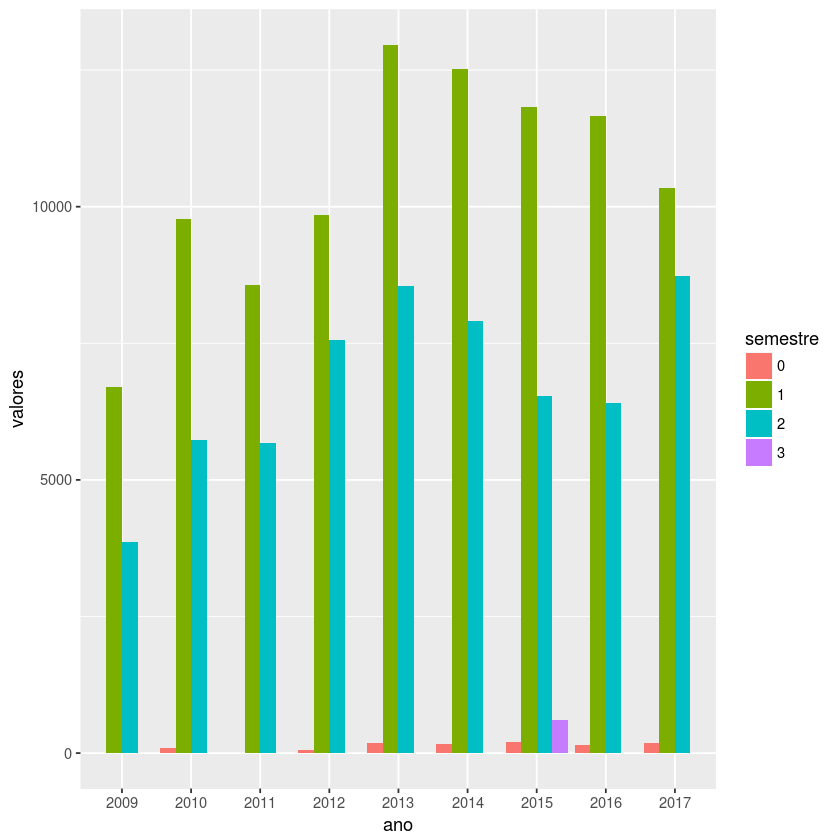

In [20]:
myplot <- ggplot(ingressantes,aes(ano,valores,fill=semestre))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

### 3.2 Ingressantes por Nível de Ensino

In [21]:
ensino <- as.data.frame(table(discentes$ano_ingresso, discentes$nivel_ensino))

In [22]:
names(ensino)[1] <- "ano"
names(ensino)[2] <- "nivel"
names(ensino)[3] <- "valores"

str(ensino)
head(ensino)

'data.frame':	108 obs. of  3 variables:
 $ ano    : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ nivel  : Factor w/ 12 levels "DOUTORADO","FUNDAMENTAL",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ valores: int  456 629 616 618 722 681 727 826 689 30 ...


ano,nivel,valores
2009,DOUTORADO,456
2010,DOUTORADO,629
2011,DOUTORADO,616
2012,DOUTORADO,618
2013,DOUTORADO,722
2014,DOUTORADO,681


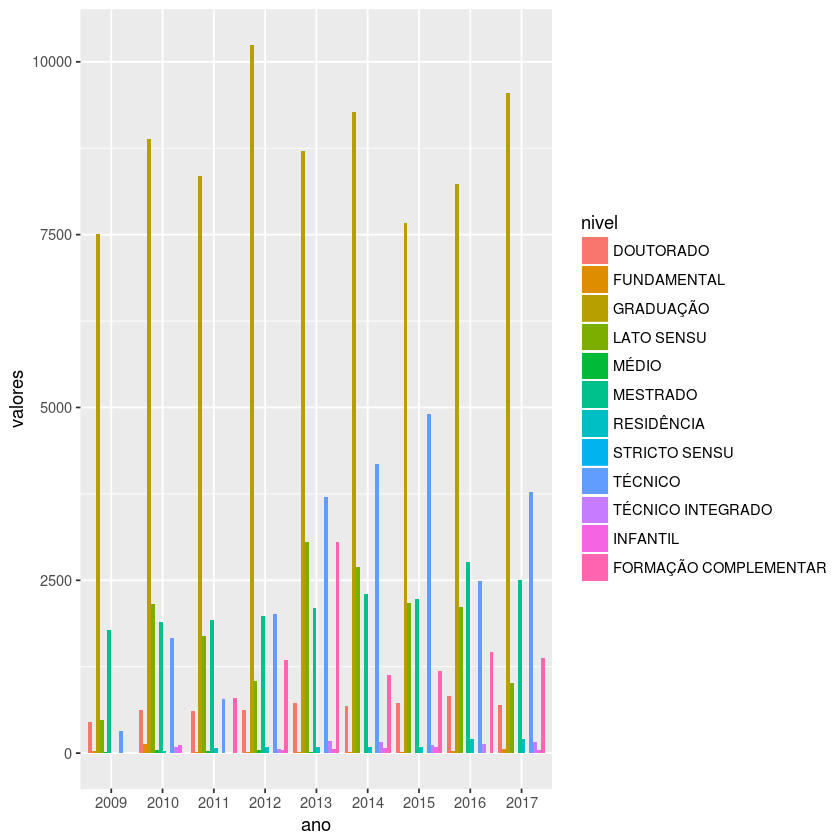

In [23]:
myplot <- ggplot(ensino,aes(ano,valores,fill=nivel))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

### 3.3 Ingressantes por Centro de Ensino e Modalidade

In [26]:
centro <- as.data.frame(table(discentes$ano_ingresso, discentes$modalidade_educacao, discentes$nome_unidade_gestora))

In [27]:
names(centro)[1] <- "ano"
names(centro)[2] <- "modalidade"
names(centro)[3] <- "centro"
names(centro)[4] <- "valores"

str(centro)
head(centro)

'data.frame':	504 obs. of  4 variables:
 $ ano       : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ modalidade: Factor w/ 4 levels "","A DISTÂNCIA",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ centro    : Factor w/ 14 levels "","CENTRO DE  ENSINO SUPERIOR DO SERIDÓ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ valores   : int  1382 1388 1255 1399 1263 1296 1348 1705 1404 0 ...


ano,modalidade,centro,valores
2009,,,1382
2010,,,1388
2011,,,1255
2012,,,1399
2013,,,1263
2014,,,1296


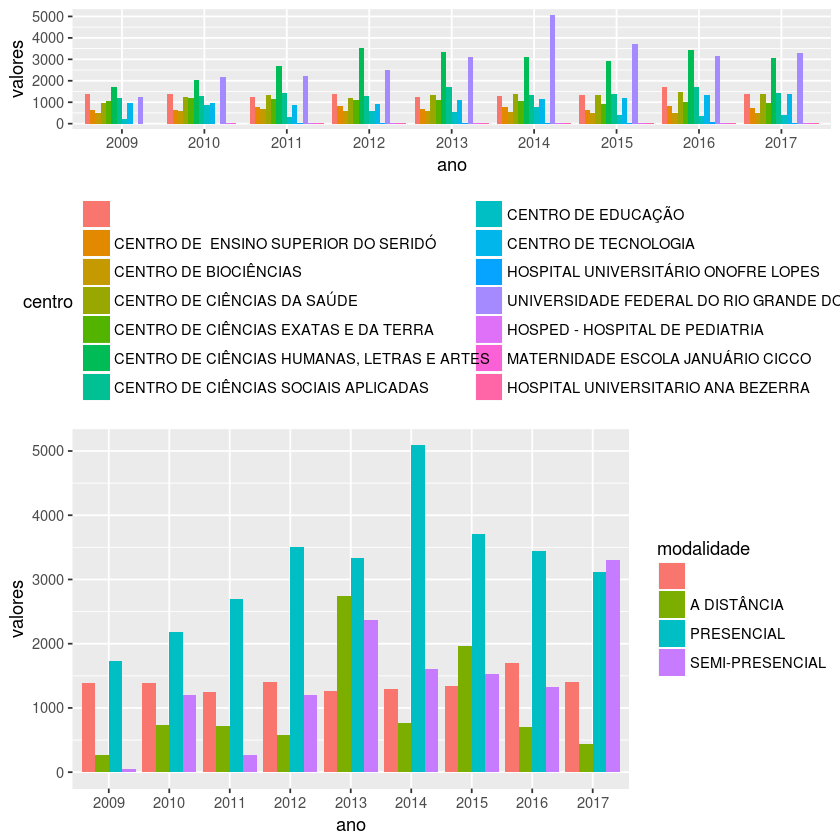

In [45]:
graf1 <- ggplot(centro,aes(ano,valores,fill=centro))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="bottom")+
    guides(fill=guide_legend(ncol=2,bycol=TRUE))

graf2 <- ggplot(centro,aes(ano,valores,fill=modalidade))+
   geom_bar(position="dodge",stat="identity")

grid.arrange(graf1, graf2, ncol=1)

### 3.4 Agrupamento de Ingressos por Alunos

Neste caso há uma ambiguidade, o mesmo aluno pode ser homonimo ou de fato um re-ingressante. No caso de re-ingressante pode ser devido a mudança de curso, acesso à pós-graduação ou ingresso em um curso técnico.

#### Calculando quantas vezes cada aluno ingressou na UFRN

In [46]:
alunos <- as.data.frame(table(discentes$nome_discente))

names(alunos)[1] <- "nome"
names(alunos)[2] <- "total"

str(alunos)
head(alunos)

'data.frame':	107089 obs. of  2 variables:
 $ nome : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total: int  2 1 1 3 1 4 3 1 2 1 ...


nome,total
Abdias Beserra Pereira Júnior,2
ABDO FARRET NETO,1
ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,1
ABELARDO MONTEIRO BEZERRA DE MELO NETO,3
ABIGAIL CALDAS BATISTA GONDIM,1
ABIGAIL NOÁDIA BARBALHO DA SILVA,4


#### Calculando quantas vezes cada `frequencia` se repete 

In [47]:
frequencia <- as.data.frame(table(alunos$total))

names(frequencia)[1] <- "freq"
names(frequencia)[2] <- "total"

str(frequencia)
head(frequencia)

'data.frame':	14 obs. of  2 variables:
 $ freq : Factor w/ 14 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total: int  74638 21087 7251 2675 969 307 102 36 16 4 ...


freq,total
1,74638
2,21087
3,7251
4,2675
5,969
6,307


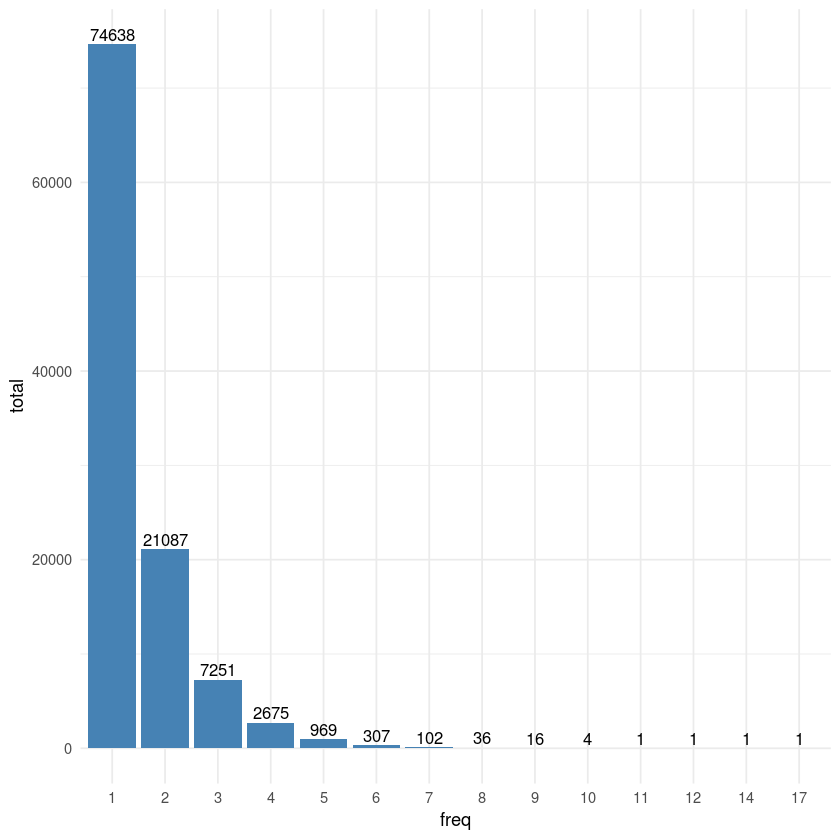

In [57]:
myplot <- ggplot(frequencia, aes(freq, total)) +
    geom_bar(stat="identity", fill="steelblue")+
    geom_text(aes(label=total), vjust=-0.3, size=3.5)+
    theme_minimal()

print(myplot)

In [63]:
alunos <- arrange(alunos,desc(total))

In [64]:
head(alunos)

nome,total
MARIA APARECIDA DA SILVA,17
MAÍSA CARVALHO DE SOUZA VIEGA,14
MARINHO BEZERRA DE ARAUJO FILHO,12
MARIA CLARA QUEIROZ DE SOUSA,11
ANA CAROLINA MORAIS SALES,10
RIVALDO FERNANDES PEREIRA,10


In [75]:
subset(discentes, nome_discente == "MARIA APARECIDA DA SILVA")

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
7012,2009073398,MARIA APARECIDA DA SILVA,2009,2,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000009,CIÊNCIAS BIOLÓGICAS,PRESENCIAL,440,CENTRO DE BIOCIÊNCIAS,440,CENTRO DE BIOCIÊNCIAS
21053,2010017498,MARIA APARECIDA DA SILVA,2010,1,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000069,TURISMO,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
21054,2010084429,MARIA APARECIDA DA SILVA,2010,1,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2671321,GEOGRAFIA,A DISTÂNCIA,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
21055,2010079090,MARIA APARECIDA DA SILVA,2010,1,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000054,MATEMÁTICA,PRESENCIAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
35739,2011505427,MARIA APARECIDA DA SILVA,2011,2,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979169,CURSO DE LÍNGUA INGLESA  BÁSICO,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
52287,2012105072,MARIA APARECIDA DA SILVA,2012,1,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CANCELADO,E,MESTRADO,84739892,MESTRADO PROFISSIONAL EM MATEMÁTICA EM REDE NACIONAL,PRESENCIAL,5671,PROGRAMA DE PÓS-GRADUAÇÃO EM MATEMÁTICA EM REDE NACIONAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
52288,2012961600,MARIA APARECIDA DA SILVA,2012,2,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000068,SERVIÇO SOCIAL,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
52289,2012506877,MARIA APARECIDA DA SILVA,2012,1,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979728,CURSO DE LÍNGUA INGLESA PARA FINS ACADÊMICOS,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
72429,2013044605,MARIA APARECIDA DA SILVA,2013,1,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NA,,,NA,,NA,
72430,2013350304,MARIA APARECIDA DA SILVA,2013,2,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,100755694,TÉCNICO EM COOPERATIVISMO A DISTÂNCIA E-TEC,A DISTÂNCIA,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


### 3.5 Ingressos por Aluno e Ano

In [76]:
alunos_ano <- as.data.frame(table(discentes$nome_discente, discentes$ano_ingresso))

names(alunos_ano)[1] <- "nome"
names(alunos_ano)[2] <- "ano"
names(alunos_ano)[3] <- "total"

str(alunos_ano)
head(alunos_ano)

'data.frame':	963801 obs. of  3 variables:
 $ nome : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ano  : Factor w/ 9 levels "2009","2010",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ total: int  1 1 1 1 1 1 1 1 1 1 ...


nome,ano,total
Abdias Beserra Pereira Júnior,2009,1
ABDO FARRET NETO,2009,1
ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,2009,1
ABELARDO MONTEIRO BEZERRA DE MELO NETO,2009,1
ABIGAIL CALDAS BATISTA GONDIM,2009,1
ABIGAIL NOÁDIA BARBALHO DA SILVA,2009,1


In [79]:
frequencia_ano <- as.data.frame(table(alunos_ano$ano, alunos_ano$total))

names(frequencia_ano)[1] <- "ano"
names(frequencia_ano)[2] <- "freq"
names(frequencia_ano)[3] <- "total"

frequencia_ano <- frequencia_ano[!(frequencia_ano$freq==0),]
frequencia_ano <- droplevels(frequencia_ano)

str(frequencia_ano)
head(frequencia_ano)

'data.frame':	45 obs. of  3 variables:
 $ ano  : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ freq : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ total: int  9993 14295 12775 15606 17553 17454 17082 16245 17567 288 ...


,ano,freq,total
10,2009,1,9993
11,2010,1,14295
12,2011,1,12775
13,2012,1,15606
14,2013,1,17553
15,2014,1,17454


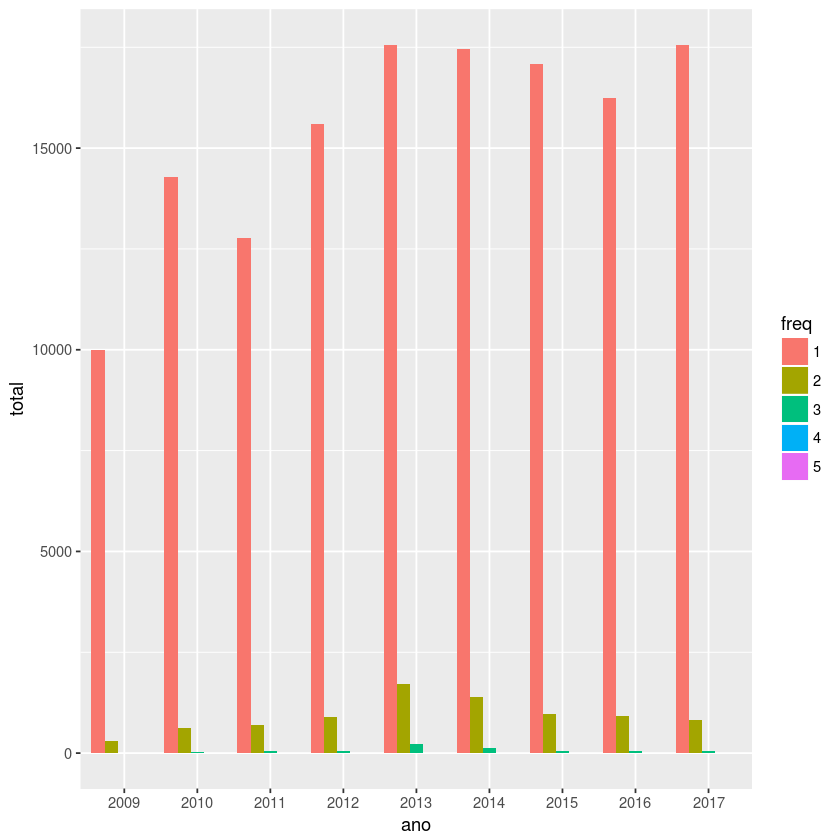

In [81]:
myplot <- ggplot(frequencia_ano,aes(ano,total,fill=freq))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

In [82]:
alunos_ano <- arrange(alunos_ano,desc(total))

In [83]:
head(alunos_ano)

nome,ano,total
ALESON BELO DA SILVA,2013,5
FELIPE DIDIER GAMEIRO,2013,5
JOÃO BATISTA DA SILVA,2009,4
SAYONARA OLIVEIRA FREITAS,2010,4
ANA PAULA PEREIRA DO NASCIMENTO SILVA,2010,4
MARIA DAS GRAÇAS DA SILVA,2012,4


In [84]:
subset(discentes, nome_discente == "ALESON BELO DA SILVA")

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
58560,2013065893,ALESON BELO DA SILVA,2013,2,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000002,ADMINISTRAÇÃO,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
58561,2013082132,ALESON BELO DA SILVA,2013,2,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000029,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA
58562,2013042558,ALESON BELO DA SILVA,2013,1,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,111635066,MATEMÁTICA,PRESENCIAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
58563,2013046600,ALESON BELO DA SILVA,2013,1,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,92127264,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58564,2013315118,ALESON BELO DA SILVA,2013,1,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
120000,2016500620,ALESON BELO DA SILVA,2016,1,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86980317,CURSO DE LÍNGUA ESPANHOLA - BÁSICO,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
